In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [95]:
# Step 1: Open excel data
data = pd.read_excel('data.xlsx')

In [96]:
# Step 2: Create a sample of 200 observations using random seed 2
data_sample = data.sample(n=200, random_state=2)

In [98]:
# Step 3: Display the first 5 rows of data
data_sample.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
129,rlindsey@norris.com,"581 Smith Prairie Suite 995\nAndersontown, AS ...",Green,32.771715,11.540832,37.526421,2.924021,431.617734
280,carrillojacob@perry-larsen.com,"909 Hicks Mountains\nGabriellaport, MD 33121",Aquamarine,32.271848,13.485009,37.550880,3.086337,511.979860
440,hortonrobert@hotmail.com,"31309 Stacey Keys Apt. 979\nSouth Jason, KS 35357",Salmon,33.200616,11.965980,36.831536,3.549036,499.140152
384,brandonsmith@yahoo.com,62106 Nathan Mountain Suite 505\nNorth Matthew...,Gold,33.593964,11.520567,36.189132,3.561215,474.532329
225,alexandra26@summers-davis.com,Unit 7032 Box 7016\nDPO AE 44749-2992,Navy,32.836941,10.256549,36.143908,0.789520,256.670582


In [102]:
# Step 4: Generate descriptive statistics for the data
data_sample.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,33.071907,12.072678,37.078808,3.464708,496.810877
std,1.020723,1.012592,1.011174,1.024933,83.111672
min,29.532429,8.508152,33.913847,0.789520,256.670582
25%,32.374273,11.422188,36.309003,2.843207,444.585379
50%,33.107822,11.968866,37.173946,3.449741,496.112641
75%,33.702703,12.814015,37.698289,4.119569,546.256806
max,36.139662,15.126994,40.005182,6.922689,765.518462


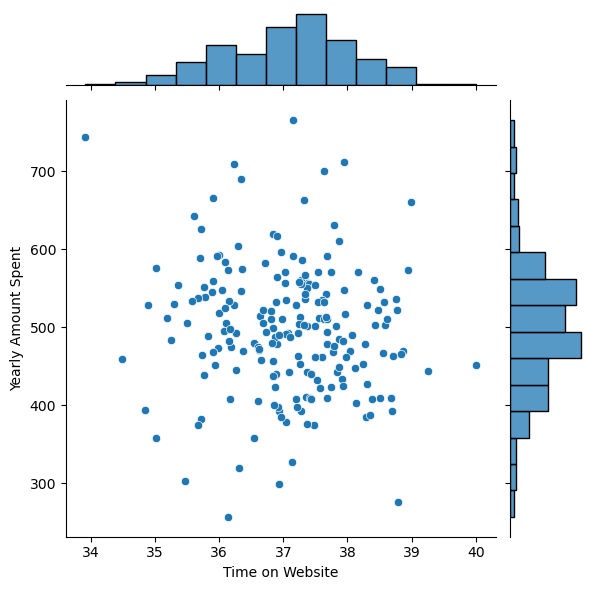

In [103]:
# 5. Create a jointplot to compare "Time on Website" and "Yearly Amount Spent" columns
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=data_sample)

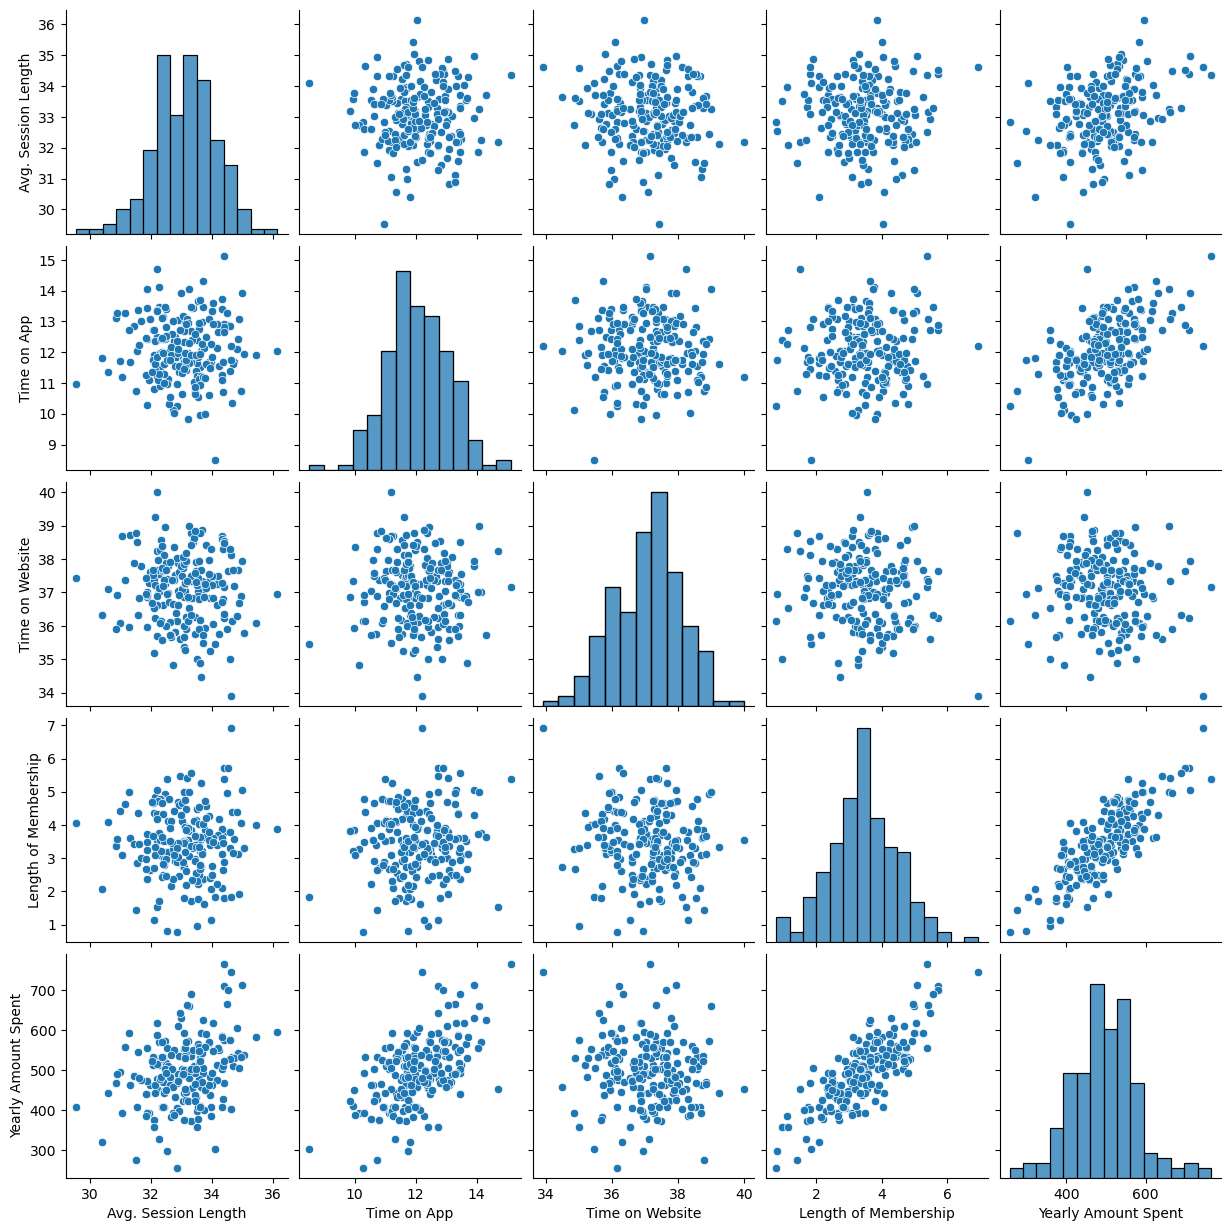

In [64]:
# 6. Plot relationships between all pairs of data
sns.pairplot(data_sample)

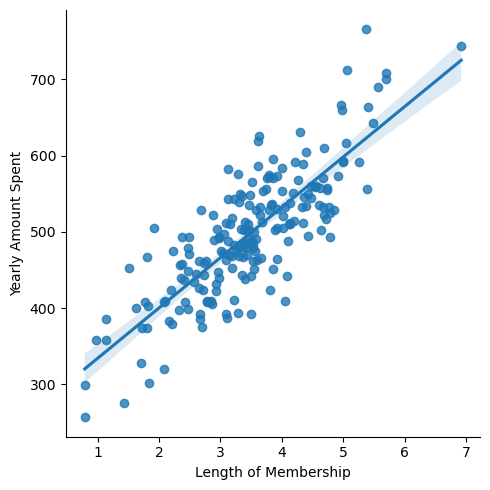

In [106]:
# 7. Create a linear model plot for "Yearly Amount Spent" vs. "Length of Membership"
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data_sample)

In [128]:
#8 Set variable X to the numerical features of customers, and variable y to the "Yearly Amount Spent" column
X = data_sample.select_dtypes(include=['float64'])
y = data_sample['Yearly Amount Spent']

In [138]:
#9 Split the data into a training set and testing set, with 15% of data in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [139]:
#10 To fit a linear regression model using sklearn.linear_model:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [140]:
#11 Show the coefficients of the fitted model

print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-1.16433759e-14 -3.06461669e-14  3.64606743e-15 -2.78208418e-14
  1.00000000e+00]


In [145]:
#12 Check the model's performance by predicting test values

y_pred=reg.predict(X_test)

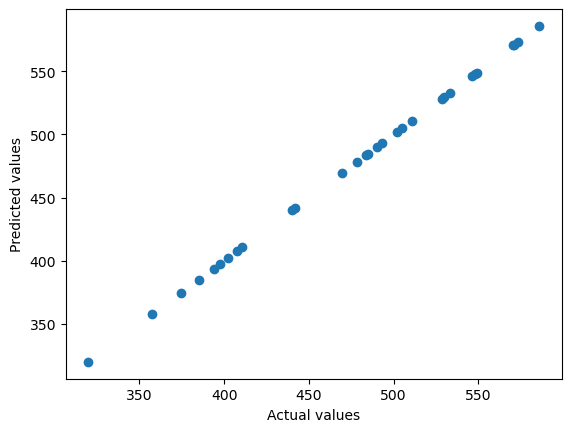

In [146]:
#13  To create a scatterplot comparing real vs. predicted values:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [149]:
#14 To calculate Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error:


print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.410605131648481e-14
Mean Squared Error: 3.446585885637615e-27
Root Mean Squared Error: 5.870763055717387e-14


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

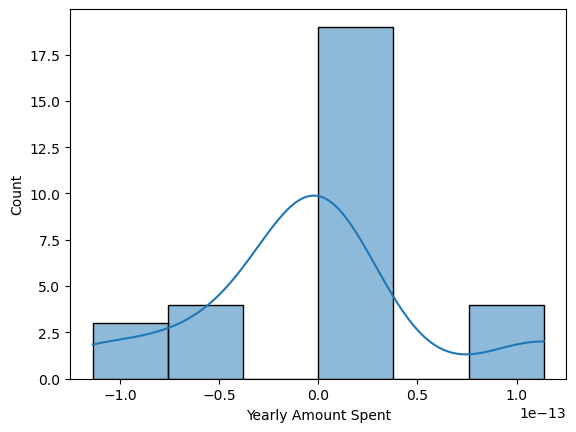

In [150]:
#15 To plot a histogram of the residuals:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)